# Students Performance in Exames
#### Marks secured by the students in various subjects



## Inspiration
#### To understand the influence of various factors like economic, personal and social on the students performance

Necessary modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

Reading the data from the file

In [2]:
df = pd.read_csv("../input/StudentsPerformance.csv")

Let us look at the data

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dataset size

In [4]:
df.shape

(1000, 8)

Some information on the data

In [5]:
df.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


Checking if there are some null values

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Text(0.5, 0.98, 'Distribution of exam scores')

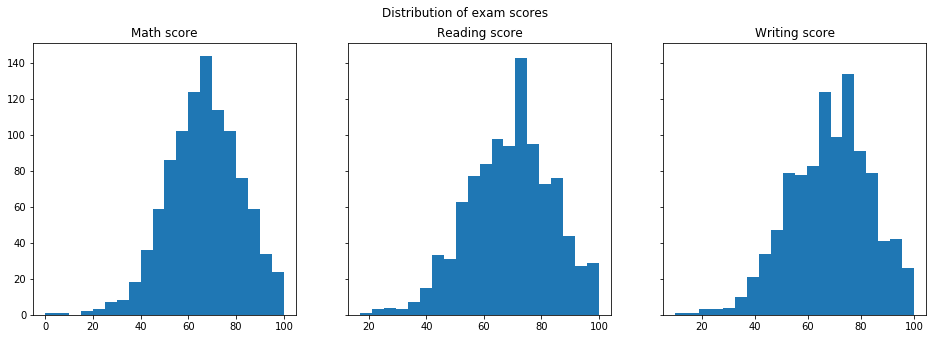

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
axs[0].hist(df["math score"], bins=20)
axs[0].set_title("Math score")
axs[1].hist(df["reading score"], bins=20)
axs[1].set_title("Reading score")
axs[2].hist(df["writing score"], bins=20)
axs[2].set_title("Writing score")
fig.suptitle("Distribution of exam scores")

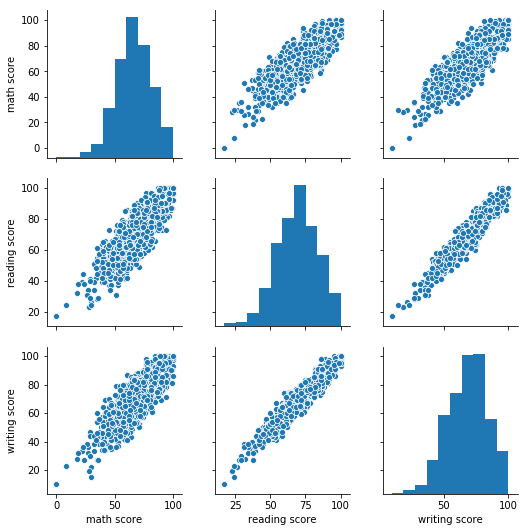

In [8]:
sns.pairplot(df)

As we can see, most of the scores seem correlated, but score for writing and reading seem to present the biggest correlation.<br>
Let us check this.

In [9]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


This results support our previous theory with the biggest correlation scores between reading and writing.

Let us check the distribution in the categorical features.

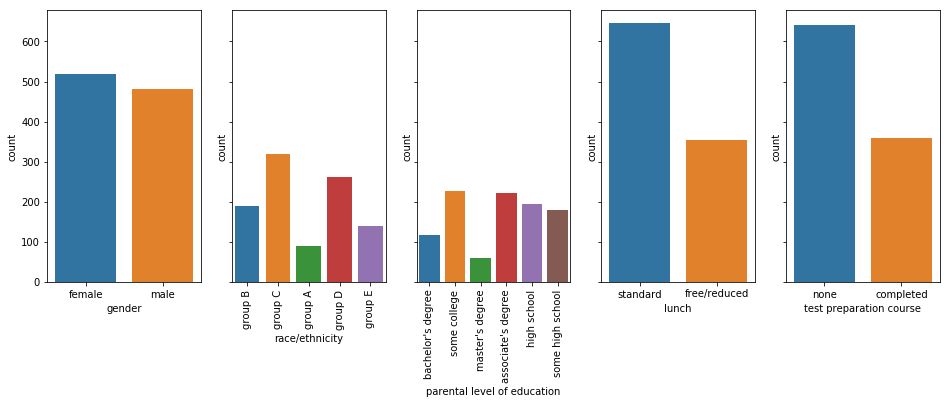

In [10]:
fig, axs = plt.subplots(1, 5, figsize=(16, 5), sharey=True)
sns.countplot(df.gender, ax = axs[0])
ax0 = sns.countplot(df["race/ethnicity"], ax = axs[1])
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
ax1 = sns.countplot(df["parental level of education"], ax = axs[2])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.countplot(df.lunch, ax = axs[3])
sns.countplot(df["test preparation course"], ax = axs[4])

Let us see if there is some statistically significantly difference between these groups using 95% confident interval and the null hypothesis being that there is no difference between the groups when comparing scores.

### Gender

In [11]:
mc = MultiComparison(df['math score'], df['gender'])
mc_results = mc.tukeyhsd()
print()
print("Math Scores")
print(mc_results)
mr = MultiComparison(df['reading score'], df['gender'])
mr_results = mr.tukeyhsd()
print()
print("Reading Scores")
print(mr_results)
mw = MultiComparison(df['writing score'], df['gender'])
mw_results = mw.tukeyhsd()
print()
print("Writing Scores")
print(mw_results)


Math Scores
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
female  male   5.095   3.2377 6.9523  True 
-------------------------------------------

Reading Scores
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
female  male  -7.1351  -8.8942 -5.3759  True 
---------------------------------------------

Writing Scores
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
female  male   -9.156  -10.9564 -7.3556  True 
----------------------------------------------


As we can see, in the case of gender, the null hypothesis should be rejected in all the exams and, as such, there is a statistically significantly difference between the groups for all of them

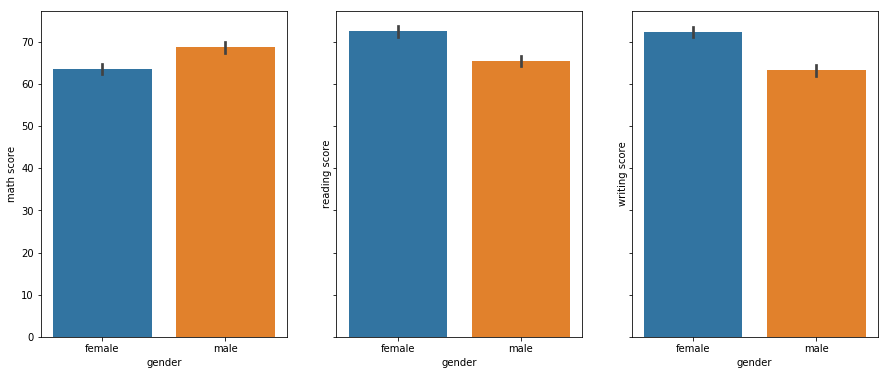

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
sns.barplot(x='gender',y='math score',data=df, ax=axs[0])
sns.barplot(x='gender',y='reading score',data=df, ax=axs[1])
sns.barplot(x='gender',y='writing score',data=df, ax=axs[2])

As we can see there is a difference in scores when separating the students in female and male. In the math exame, the male students performed better, but in both reading and writing exams it was the female students that out-performed the other students.

#### Race/ethnicity

In [13]:
mc = MultiComparison(df['math score'], df['race/ethnicity'])
mc_results = mc.tukeyhsd()
print()
print("Math Scores")
print(mc_results)
mr = MultiComparison(df['reading score'], df['race/ethnicity'])
mr_results = mr.tukeyhsd()
print()
print("Reading Scores")
print(mr_results)
mw = MultiComparison(df['writing score'], df['race/ethnicity'])
mw_results = mw.tukeyhsd()
print()
print("Writing Scores")
print(mw_results)


Math Scores
Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower   upper  reject
-----------------------------------------------
group A group B  1.8234   -3.36   7.0068 False 
group A group C  2.8347  -2.0028  7.6723 False 
group A group D  5.7334   0.7824 10.6844  True 
group A group E 12.1922   6.7215 17.6629  True 
group B group C  1.0113  -2.6867  4.7094 False 
group B group D   3.91    0.0647  7.7552  True 
group B group E 10.3688   5.8741 14.8635  True 
group C group D  2.8986  -0.4659  6.2632 False 
group C group E  9.3575   5.2665 13.4485  True 
group D group E  6.4588   2.2343 10.6834  True 
-----------------------------------------------

Reading Scores
Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower   upper  reject
-----------------------------------------------
group A group B  2.6785  -2.3998  7.7567 False 
group A group C  4.4293  -0.3101  9.1687 False 
group A group D  5.3564   0.5058 10.2069  True 
group

As we can see there are some rejections of the hull hypothesis. Mainly envolving group D and E, with the biggest meandiff between groups being between group A and group E.

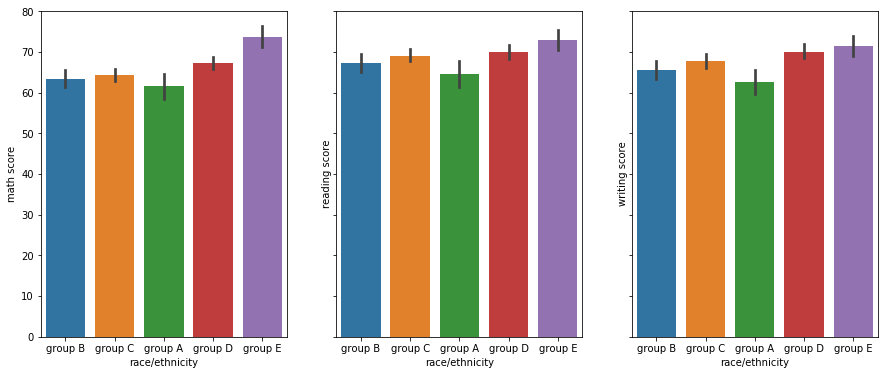

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
sns.barplot(x='race/ethnicity',y='math score',data=df, ax=axs[0])
sns.barplot(x='race/ethnicity',y='reading score',data=df, ax=axs[1])
sns.barplot(x='race/ethnicity',y='writing score',data=df, ax=axs[2])

This difference can also be seen in the barplot with the difference between group A and E being significant across the board.

#### Parental level of education

In [15]:
mc = MultiComparison(df['math score'], df['parental level of education'])
mc_results = mc.tukeyhsd()
print()
print("Math Scores")
print(mc_results)
mr = MultiComparison(df['reading score'], df['parental level of education'])
mr_results = mr.tukeyhsd()
print()
print("Reading Scores")
print(mr_results)
mw = MultiComparison(df['writing score'], df['parental level of education'])
mw_results = mw.tukeyhsd()
print()
print("Writing Scores")
print(mw_results)


Math Scores
          Multiple Comparison of Means - Tukey HSD,FWER=0.05         
      group1             group2      meandiff  lower    upper  reject
---------------------------------------------------------------------
associate's degree bachelor's degree  1.5069  -3.3586   6.3725 False 
associate's degree    high school    -5.7451  -9.9311  -1.5592  True 
associate's degree  master's degree   1.8629  -4.3926   8.1184 False 
associate's degree    some college   -0.7546  -4.7903   3.2812 False 
associate's degree  some high school -4.3857  -8.6759  -0.0954  True 
bachelor's degree     high school    -7.2521  -12.2284 -2.2758  True 
bachelor's degree   master's degree   0.3559  -6.4538   7.1657 False 
bachelor's degree     some college   -2.2615  -7.1121   2.5891 False 
bachelor's degree   some high school -5.8926  -10.957  -0.8283  True 
   high school      master's degree   7.608    1.266    13.95   True 
   high school        some college    4.9906   0.822    9.1591  True 
   high

When comparing with the parental level of edutacion, most of the rejection of the null hypothesis comes from comparisons with "high school" and "some high school".

[Text(0, 0, "bachelor's degree"),
 Text(0, 0, 'some college'),
 Text(0, 0, "master's degree"),
 Text(0, 0, "associate's degree"),
 Text(0, 0, 'high school'),
 Text(0, 0, 'some high school')]

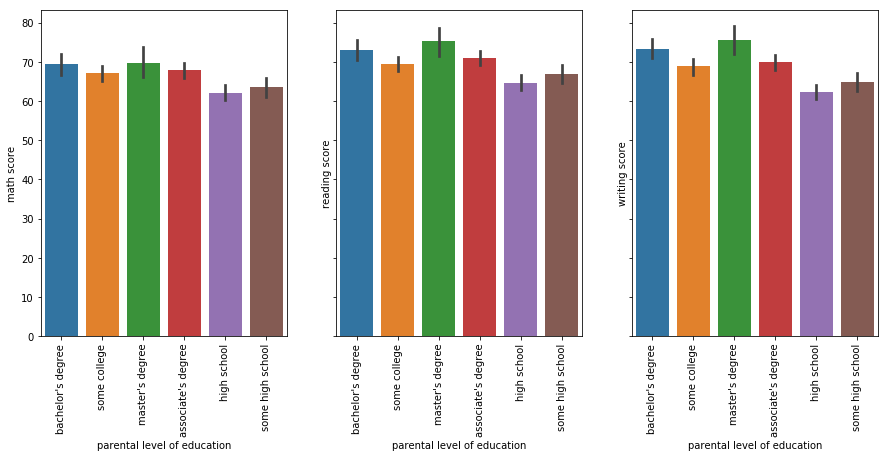

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
a1 = sns.barplot(x='parental level of education',y='math score',data=df, ax=axs[0])
a2 = sns.barplot(x='parental level of education',y='reading score',data=df, ax=axs[1])
a3 = sns.barplot(x='parental level of education',y='writing score',data=df, ax=axs[2])
a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
a2.set_xticklabels(a2.get_xticklabels(), rotation=90)
a3.set_xticklabels(a3.get_xticklabels(), rotation=90)

This can also be seen in the bar plot where the bars for these two groups are clearly lower than most for all scores.

#### Lunch

In [17]:
mc = MultiComparison(df['math score'], df['lunch'])
mc_results = mc.tukeyhsd()
print()
print("Math Scores")
print(mc_results)
mr = MultiComparison(df['reading score'], df['lunch'])
mr_results = mr.tukeyhsd()
print()
print("Reading Scores")
print(mr_results)
mw = MultiComparison(df['writing score'], df['lunch'])
mw_results = mw.tukeyhsd()
print()
print("Writing Scores")
print(mw_results)


Math Scores
 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
   group1     group2  meandiff lower   upper  reject
----------------------------------------------------
free/reduced standard  11.113  9.2707 12.9553  True 
----------------------------------------------------

Reading Scores
Multiple Comparison of Means - Tukey HSD,FWER=0.05
   group1     group2  meandiff lower upper  reject
--------------------------------------------------
free/reduced standard  7.0007  5.157 8.8445  True 
--------------------------------------------------

Writing Scores
 Multiple Comparison of Means - Tukey HSD,FWER=0.05
   group1     group2  meandiff lower  upper  reject
---------------------------------------------------
free/reduced standard  7.8007  5.8896 9.7118  True 
---------------------------------------------------


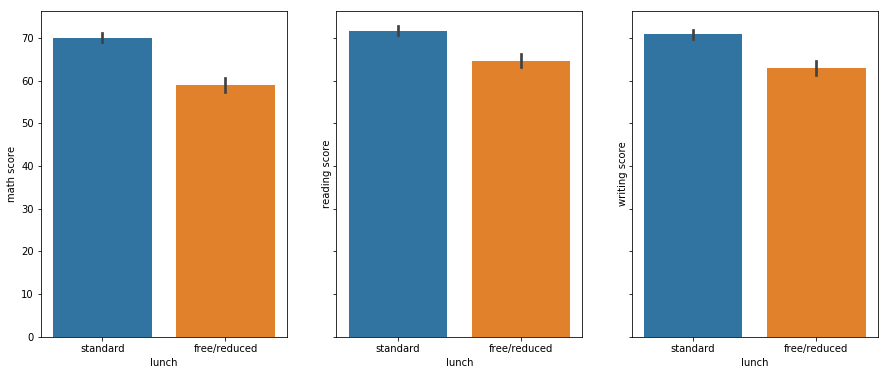

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
sns.barplot(x='lunch',y='math score',data=df, ax=axs[0])
sns.barplot(x='lunch',y='reading score',data=df, ax=axs[1])
sns.barplot(x='lunch',y='writing score',data=df, ax=axs[2])

As it is possible to see, also when comparing lunch costs, the students with "free/reduced" cost performed worse than the others.

#### Test preparation course

In [19]:
mc = MultiComparison(df['math score'], df['test preparation course'])
mc_results = mc.tukeyhsd()
print()
print("Math Scores")
print(mc_results)
mr = MultiComparison(df['reading score'], df['test preparation course'])
mr_results = mr.tukeyhsd()
print()
print("Reading Scores")
print(mr_results)
mw = MultiComparison(df['writing score'], df['test preparation course'])
mw_results = mw.tukeyhsd()
print()
print("Writing Scores")
print(mw_results)


Math Scores
Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1  group2 meandiff  lower   upper  reject
------------------------------------------------
completed  none  -5.6176  -7.5501 -3.6852  True 
------------------------------------------------

Reading Scores
Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1  group2 meandiff  lower   upper  reject
------------------------------------------------
completed  none  -7.3596  -9.1943 -5.5249  True 
------------------------------------------------

Writing Scores
Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1  group2 meandiff  lower    upper  reject
-------------------------------------------------
completed  none  -9.9143  -11.7834 -8.0453  True 
-------------------------------------------------


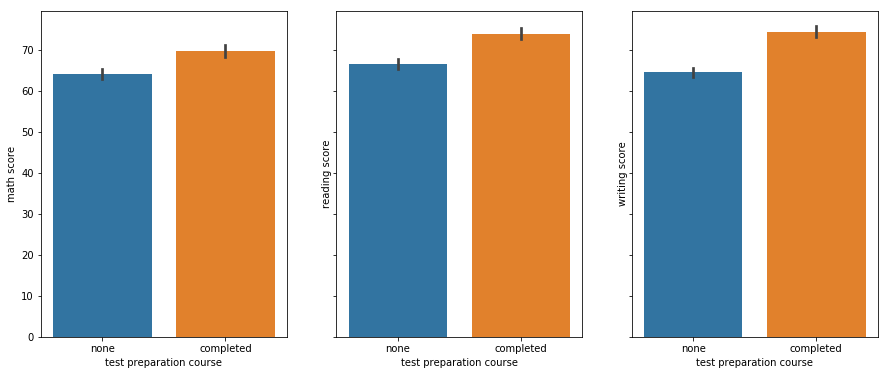

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
sns.barplot(x='test preparation course',y='math score',data=df, ax=axs[0])
sns.barplot(x='test preparation course',y='reading score',data=df, ax=axs[1])
sns.barplot(x='test preparation course',y='writing score',data=df, ax=axs[2])